In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [204]:
import pandas_profiling

In [205]:
german= pd.read_csv('germancredit.csv')

In [206]:
german.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


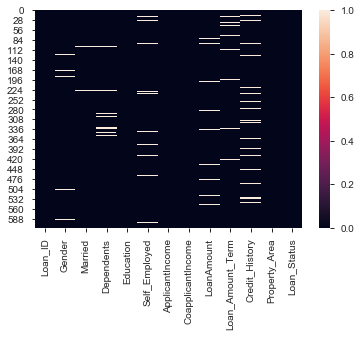

In [207]:
sns.heatmap(german.isnull())

In [208]:
german.drop('Self_Employed',axis=1,inplace=True)

In [24]:
pandas_profiling.ProfileReport(german)

Number of variables,8
Number of observations,614
Total Missing (%),0.8%
Total size in memory,38.5 KiB
Average record size in memory,64.1 B
Numeric,3
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,0


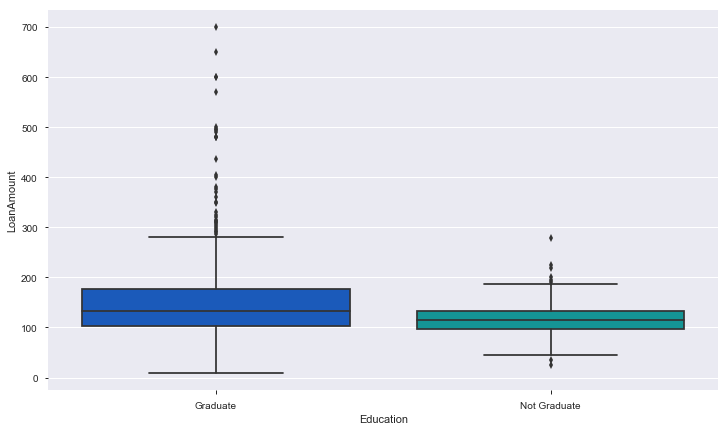

In [209]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Education',y='LoanAmount',data=german,palette='winter')

In [210]:
def impute_loan(cols):
    Education = cols[0]
    LoanAmount = cols[1]
    
    if pd.isnull(LoanAmount):
        
        if Education =='Graduate':
            return 140
        elif Education =='Not Graduate':
            return 120
      
    else:
            return LoanAmount

In [211]:
german['LoanAmount']=german[['Education','LoanAmount']].apply(impute_loan,axis=1)

In [212]:
german.dropna(inplace=True)

In [213]:
german.head()

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,5849,0.0,140.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,6000,0.0,141.0,360.0,1.0,Urban,Y


In [214]:
Married = pd.get_dummies(german['Married'],drop_first=True)
Education = pd.get_dummies(german['Education'],drop_first=True)
Property_Area = pd.get_dummies(german['Property_Area'],drop_first=True)
Loan_Status = pd.get_dummies(german['Loan_Status'],drop_first=True)

In [215]:
german.drop(['Married','Education','Property_Area','Loan_Status','Loan_ID','Gender'],axis=1,inplace=True)

In [218]:
german.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Semiurban,Urban,Y
0,0,5849,0.0,140.0,360.0,1.0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,0,0,0,1,1


In [173]:
german.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Semiurban,Urban,Y
0,0,5849,0.0,140.0,360.0,1.0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,0,0,0,1,1


In [217]:
german = pd.concat([german,Married,Education,Property_Area,Loan_Status],axis=1)

In [220]:
german.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Yes', 'Not Graduate',
       'Semiurban', 'Urban', 'Y'],
      dtype='object')

In [230]:
german.columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Yes', 'Not Graduate',
       'Semiurban', 'Urban', 'Y'],
      dtype='object')

In [178]:
from sklearn.model_selection import train_test_split

In [231]:
X =german[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Yes', 'Not Graduate',
       'Semiurban', 'Urban']]
 
y = german['Y']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\SAM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Semiurban,Urban,Y
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,1
610,3+,4106,0.0,40.0,180.0,1.0,1,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,0,0,1,1
612,2,7583,0.0,187.0,360.0,1.0,1,0,0,1,1
613,0,4583,0.0,133.0,360.0,0.0,0,0,1,0,0


In [199]:
german.columns

Index(['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Yes', 'Not Graduate', 'Semiurban', 'Urban', 'Y', 'Yes', 'Not Graduate',
       'Semiurban', 'Urban', 'Y', 'Yes', 'Not Graduate', 'Semiurban', 'Urban',
       'Y'],
      dtype='object')

In [235]:
predictions = logmodel.predict(X_test)

In [236]:
from sklearn.metrics import classification_report

In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.50      0.63        52
           1       0.82      0.96      0.88       121

   micro avg       0.82      0.82      0.82       173
   macro avg       0.83      0.73      0.75       173
weighted avg       0.82      0.82      0.81       173



In [238]:
from sklearn.metrics import confusion_matrix

In [239]:
confusion_matrix(y_test,predictions)

array([[ 26,  26],
       [  5, 116]], dtype=int64)